<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/8-3.ConvolutionalNeuralNetowrkVisualization/hg_08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 합성곱 신경망의 시각화 : 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는 지 알아보자

# 합성곱 신경망은 특히 이미지에 이쓴 특징을 찾아 압축하는 데 뛰어난 성능을 냄
# 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림으로 시각화 하려고 함
# 케라스는 좀더 복잡한 모델을 만들 수 있도록 함수형 API를 제공한다.
# 합성곱 신경망의 체크포인트 파일을 사용함(최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있음)

# 가중치 시각화
# 합성곱 층은 여러개의 필터를 사용해 이미지에서 특징을 학습함
# 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있음
# 일반적으로 절편은 시각적으로 의미가 있지 않음
# 가중치는 입력이 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함
# 예를 들어 아래 그림과 같은 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만듬

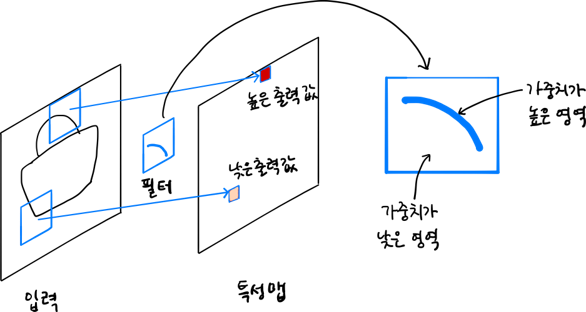

In [1]:
# 이 필터의 가운데 곡선 부분의 가중치 값은 높고 그외 부분의 가중치 값은 낮을 것임
# 이렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만듬

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [2]:
from tensorflow import keras
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2024-11-12 05:30:41--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2024-11-12 05:30:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  10.7MB/s    in 0.4s    

2024-11-12 05:30:43 (10.7 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [3]:
model = keras.models.load_model('best-cnn-model.keras') # 모델에 케라스 값을 불러옴
model.layers
# model.layers 리스트에 전에 만들었던 Conv2D, MaxPoolgin2D 층이 번갈아 가면서 연속으로 나옴
# Flatten층 -> Dense층 -> Dropout층 -> 마지막 층에 Dense 출력층도 보임

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [4]:
# 첫번째 합성곱 층의 가중치를 알아보자.
# 층의 가중치와 절편은 층의 weights 속성에 있음(리스트타입)
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)
# (원소) (절편, )
# 전에 커널 크기를 3x3으로 지정 했음, 합성곱 층의 전달되는 입력의 깊이가 1임
# 필터 개수가 32개임으로 필터마다 1개의 절편이 있음으로 (32,)가 됨

(3, 3, 1, 32) (32,)


In [5]:
# weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체임
# 다루기 쉽게 numpy() 메서드를 사용해 넘파일 배열로 변환 함
conv_weights = conv.weights[0].numpy()
# 가중치 배열의 평균(mean)과 표준편차(std)를 넘파이 메서드로 계산함
print(conv_weights.mean(), conv_weights.std())
# 결과값이 다를 수 있음
# 평균은 0에 가깝고, 편차는 0.23 정도임 (나중에 비교해볼 것임)

-0.014383553 0.23351653


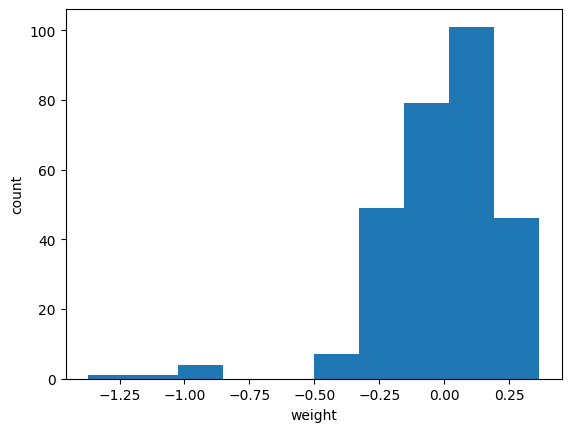

In [6]:
import matplotlib.pyplot as plt

# 맷프롤릿의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달 해야 함 (conv_weights.reshape(-1, 1))
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 0을 중심으로 분표도를 확인 할 수 있음

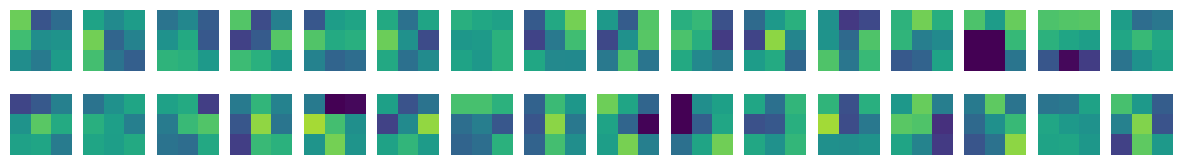

In [7]:
# 32개의 커널을 16개씩 두줄에 출력을 해보자.
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# 2x16 = 32개의 그래프 영역을 만들고 순서대로 커널을 출력해 봄
for i in range(2): # i는 행의 인덱스 0~1
    for j in range(16): # j는 열의 인덱스 0~15
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # 0,0 ~ 0,31
        axs[i, j].axis('off')
# 배열의 마지막 차원을 순회하면서 0~16 +j 번째까지의 가중치 값을 차례대로 출력
plt.show()
# 결과를 보면 이 가중치 값이 무작위로 나열 된 것이 아닌 어떤 패턴을 볼 수 있다.
# 예를 들면 첫번째 줄의 맨 왼쪽 가중치는 오른쪽 3픽셀의 값이 높음 (밝은 부분이 높음)
# 이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화 됨
# .imshow()함수는 배열에 있는 최대값과 최소값을 사용해 픽셀의 강도를 표현함.
# 즉 0.1이나 0.4나 어떤 값이든 그 배열의 최댓값이면 가장 밝은 노란색을 그린다.
# 만약 두 배열을 imshow() 함수로 비교하려면 이런 방법은 좋지 않다.
# 어떤 절대값을 기준으로 픽셀의 강도를 나타내야 비교하기 좋을 것이다.
# 이를 위해서 위 코드에서 vmin, vmax로 맷플롯립의 컬러맵(colormap)으로 표현할 범위를 지정한다.

In [8]:
# 이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 보겠다.
# 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교할 것이다.
no_training_model = keras.Sequential() # Sequential 클래스 모델을 만듬

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# Conv2D 층 하나를 추가

no_training_conv = no_training_model.layers[0]
# no_training_conv 변수에 Conv2D층의 가중치를 저장

print(no_training_conv.weights[0].shape)
# 동일하게 (3,3) 커널을 가진 필터를 32개 사용

(3, 3, 1, 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 이 가중치의 평균과 표준편차를 확인 해보자.
no_training_weights = no_training_conv.weights[0].numpy() # 넘파이 배열로 만듬

print(no_training_weights.mean(), no_training_weights.std()) # 평균(0에 가까움), 편차(매우 작음)

0.0053191613 0.08463709


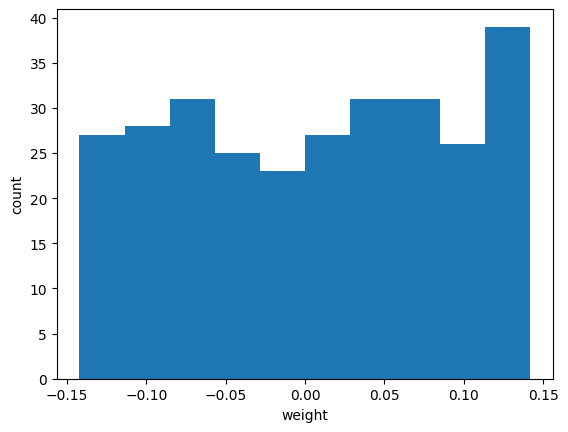

In [10]:
# 이 가중치 배열을 히스토그램으로 출력
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 대부분 가중치가 -0.15 ~ 0.15 사이에 있음
# 비교적 고른 분포를 보임(텐서플로가 신경망의 가중치를 처음 초기화할때 균등하게 분포에서 랜덤하게 값을 선택함)

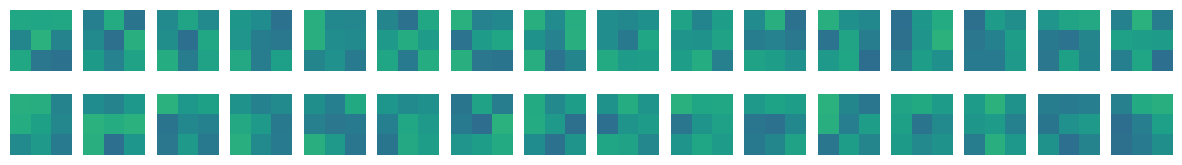

In [11]:
# imshow() 함수를 이용해서 그림으로 출력해 봄 -> 위방법과 동일 하게 설정
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
# 가중치가 밋밋하게 표현됨 (전에 학습한 것이 유용하게 패턴 학습함)

In [12]:
# 함수형 API : 케라스의 내장형 함수
# 케라스의 Sequential 클래스는 층을 차례대로 쌓은 모델을 만듬
# 딥러닝에는 좀더 복잡한 모델이 많이 있다. (입력이 2개, 출력이 2개일 수도 있음)
# 이때 사용하는 것이 함수형 API이다.
# 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듬

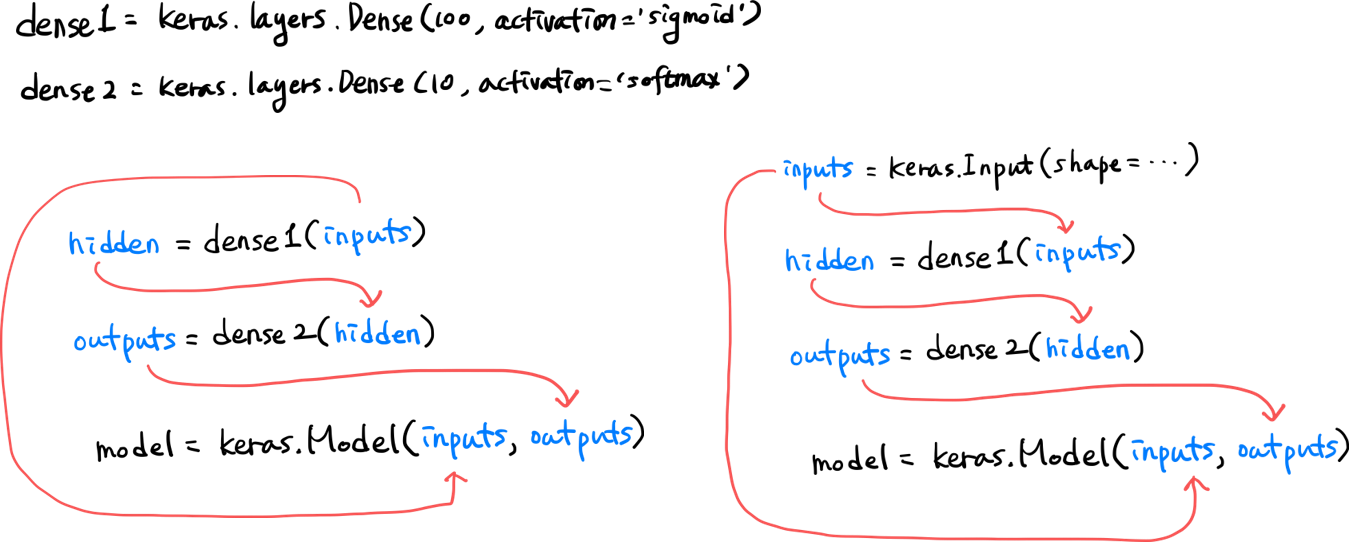

In [13]:
# Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현한 것
# 2개의 Dense 층 객체 만듬 kears.Model()안쪽 파라미터로 제공
# 입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정함
# 여기 나온 input=keras.Input()은 plot_model() 함수로 모델의 층을 도식화 했을 때 InputLayer 클래스가 처음 나온 것으로
# Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 줌
# Model 클래스에서는 우리가 수동으로 만들어서 호출 해야 함
# 전체를 합쳐보면 오른쪽 위 그림 처럼 체인으로 동작함
# 입력에서 출력까지 연결하고 마지막에 Model 클래스에 입력과 출력을 지정하여 모델을 만듬
# 이렇게 모델을 만들게 되면 중간에 다양한 형태의 층을 연결할 수 있음

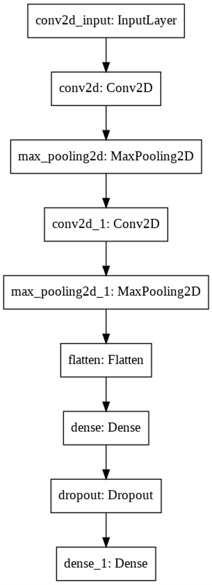

In [14]:
# 함수형 API가 필요한 이유는 model 객체의 층을 순서대로 나열하면 아래와 같다.

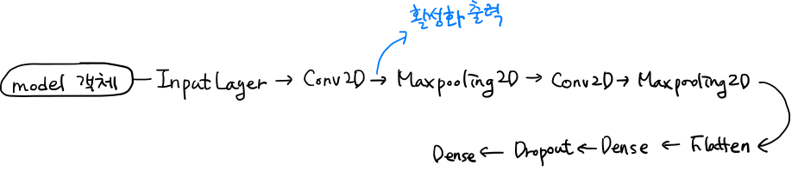

In [15]:
# 우리가 2개이상의 입력이 필요한 부분은 첫 번째 Conv2D의 출력 부분이다.
# model 객체의 입력과 Conv2D의 출력을 알수 있다면 이둘을 연결하여 새로운 모델을 얻을 수 있을 것이다.

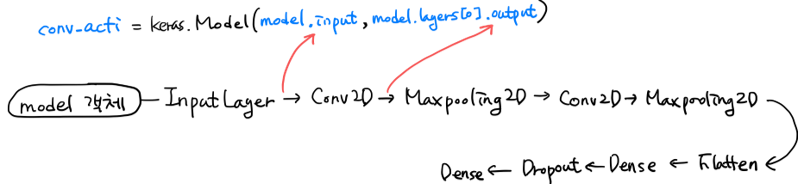

In [16]:
# model 객체를 predict() 메서드를 호출하면 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환한다.
# 하지만 우리가 필요한 것은 첫번째 Conv2D 층의 출력한 특성 맵임
# 첫 번째 층의 출력은 Conv2D 객체의 output 속성에서 얻을 수 있다. ->  model.layer[0].output 을 참조한다.
# 입력은 model.inputs으로 얻을 수 있다.

print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [18]:
# 이제 model.input 과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.

conv_acti = keras.Model(model.inputs, model.layers[0].output)

# model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환 함
# 하지만 conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환

In [19]:
# 특성 맵 시각화
# 케라스로 패션 MNIST 데이터 셋을 읽은 후 훈련 세트에 있는 첫번째 샘플을 그려 봄
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


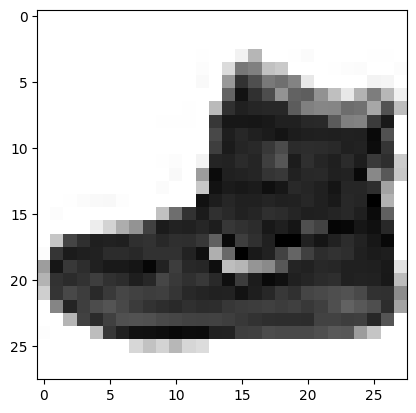

In [20]:
# 첫번째 샘플 출력
plt.imshow(train_input[0], cmap='gray_r')
plt.show()
# 앵글 부츠로 보임

In [21]:
# 이샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보겠음
# predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대함
# 하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지해야 함
# 이를 위해서 슬라이싱 연산자를 사용해 첫 번째 샘플을 선택 한다.
# 그 다음 (784,) 크기를 (28,28,1)로 변경하고 255로 나눔(전처리 과정 동일)
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [22]:
print(feature_maps.shape) # maps의 크기를 확인

(1, 28, 28, 32)


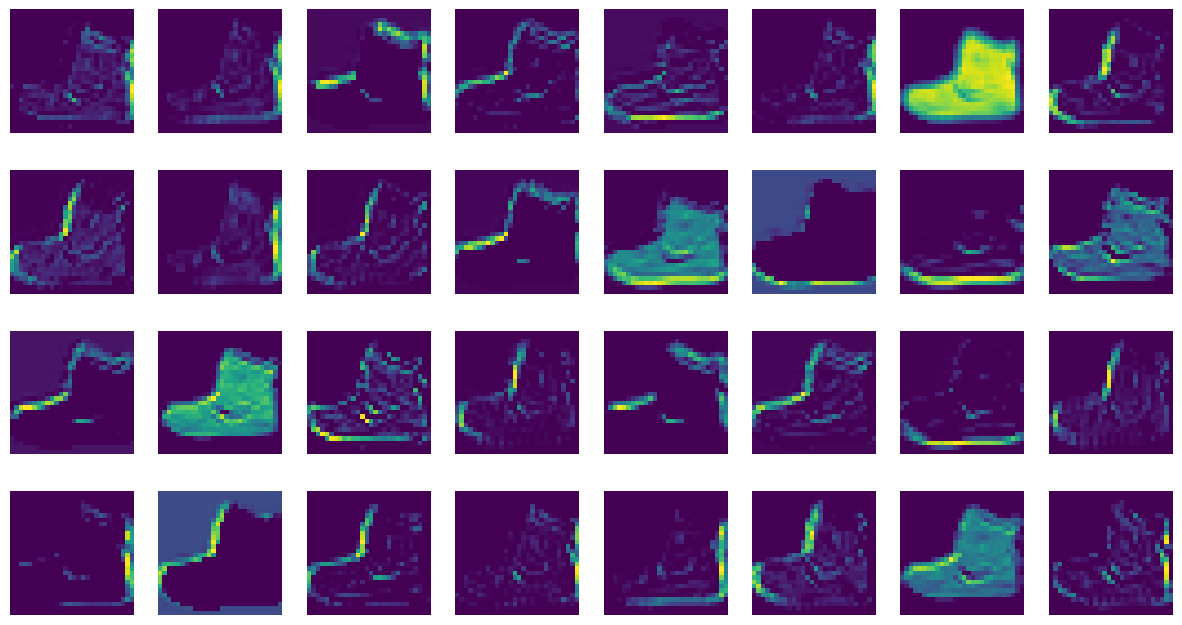

In [23]:
# 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28,28,32)임
# 첫 번재 차원은 배치 차원이라는 점을 명심
# 샘플을 하나 입력했기 때문에 1이됨

# 맷플롯립 imshow()함수로 특성 맵을 그려보자 -> 총 32개의 특성 맵이 있으므로 4행으로 나누어 출력
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

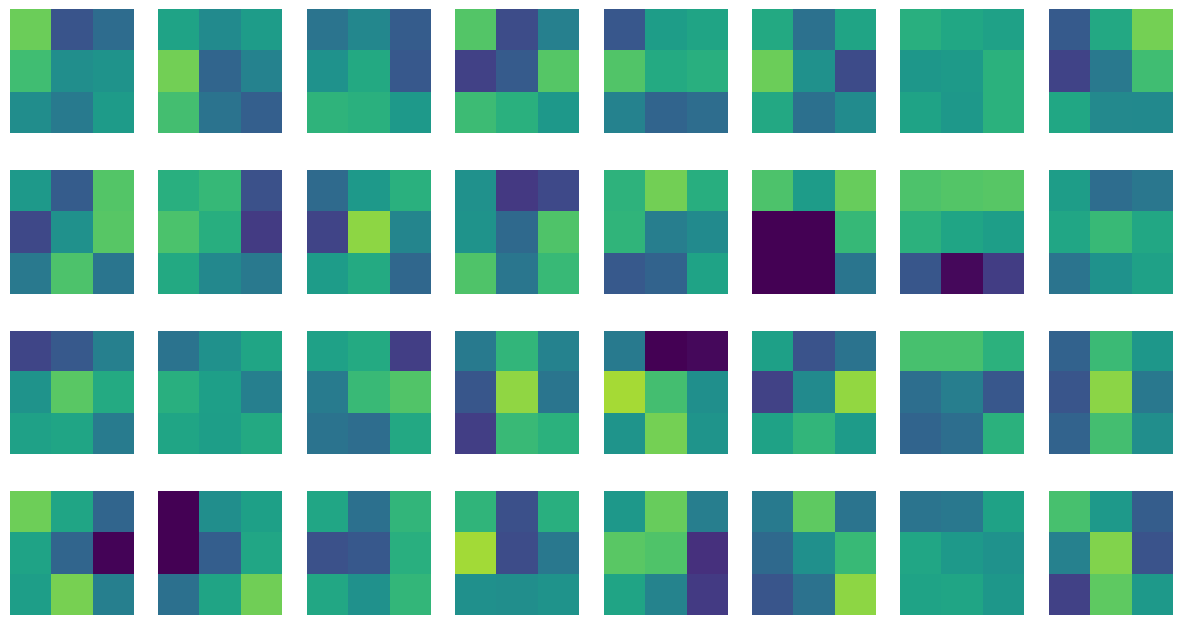

In [28]:
# 특성 맵과 비교를 해본다. (필터의 가중치를 출력한 그림과 1:1 비교)
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(conv_weights[:,:,0,i*8 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [ ]:
# 7번째 그림을 비교하면 전체적으로 밝은색 이므로 전면이 모두 칠해진 영역을 감지
# 2번째 줄 5번째 그림을 보면 위쪽이 검정색
# 흑백 부츠 이미지에서 검은 영역이 모두 잘 활성화 되어 있음

In [ ]:
# 이와 반대로 마지막 필터는 전체적으로 낮은 음수 값이다.
# 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고 배경처럼 0에 가까운 값과 곱해지면 작은 음수가 될 것임
# 즉 부츠의 배경이 상대적으로 크게 활성화 될 수 있다.

In [29]:
# 두번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인 할 수 있다.
# 먼저 model 객체의 입력과 두번째 합성곱 층인 model.layer[2]의 출력을 연결한 conv2_acti 모델을 만듬
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [30]:
# 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
# 첫번째 풀링에서 가로세로 크기가 절반으로 줄였고, 두번째 합성곱 층의 필터 개수는 64개 이므로 feature_maps 의 크기는
# 배치 차원을 제외하면 (14,14,64)임
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
(1, 14, 14, 64)


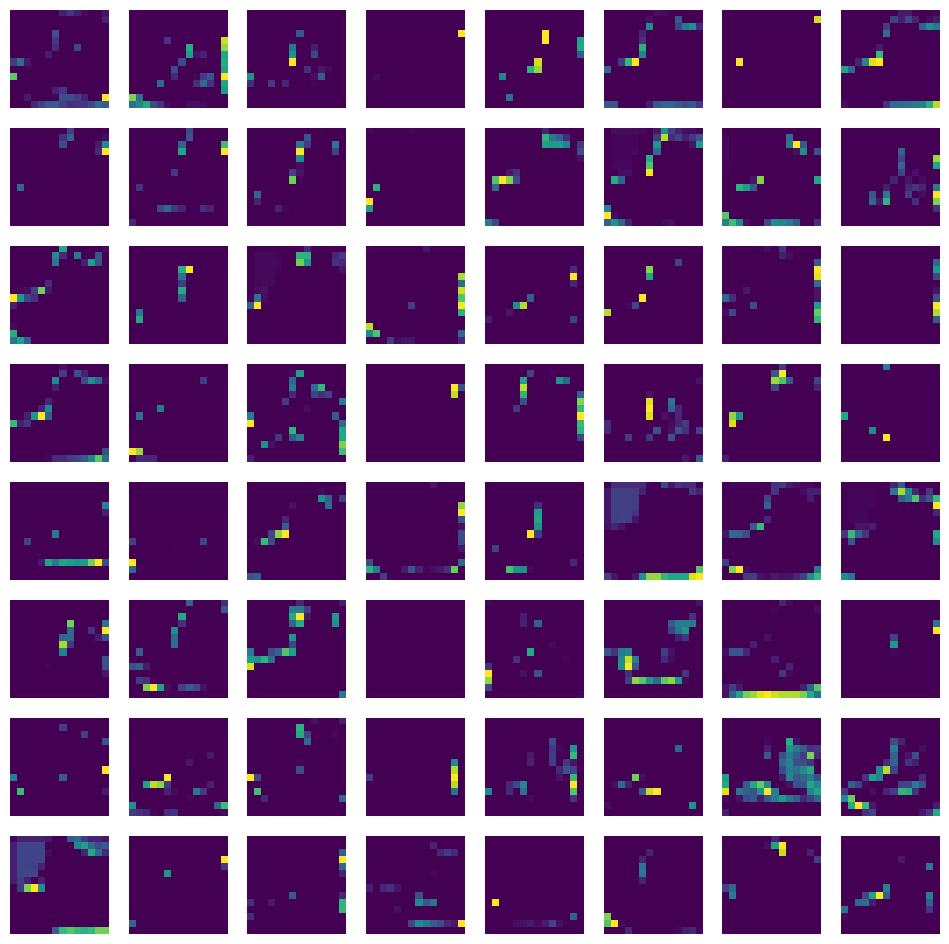

In [31]:
# 64개의 특성 맵을 8개씩 나누어 imshow()로 그려봄
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [32]:
# 이 특성 맵은 시각적으로 이해가 힘들군요
# 두번째 합성곱 층의 필터 크기는 (3,3,32)이고 두번째 합성곱 층의 첫번째 필터가 앞서 출력한 32개의 특성 맵과 곱해짐
# 두번째 합성곱 층의 첫 번째 특성 맵이 됨
# 이렇게 계산된 출력은 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 힘들지만
# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지를 시각적인 정보를 감지함
# 뒷부분은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 보면 됨 -> 10개의 클래스를 찾을 수 있는 이유

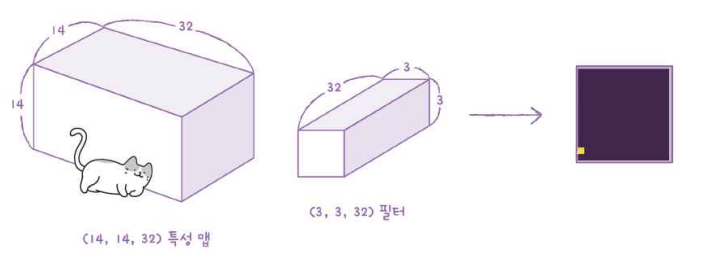